# Feature Engineering-Missing Values


## Lifecycle of a Data Science Projects

#### Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
#### Feature Engineering---Handling Missing Values
#### Why are their Missing values?? Survey--Depression Survey

They hesitate to put down the information
Survey informations are not that valid
Men--salary,
Women---age,
People may have died----NAN
Data Science Projects---Dataset should be collected from multiple sources

## What are the different types of Missing Data?


## Types of Missing values:

#### 1) Missing Completely at Random (MCAR): 
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

#### 2) Missing Data Not At Random(MNAR): 
Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

#### 3) Missing at Random (MAR): 
 Men---hide their salary,
 Women---hide their age

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
import numpy as np
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

df['Cabin_null'].mean()

0.7710437710437711

In [13]:
df.groupby('Survived')['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

## All the techniques of handlig missing values:

#### 1) Mean/Median/Mode Replacement
#### 2) Random Sample Imputation
#### 3) Capturing NAN values with a new feature
#### 4) End of Distribution Imputation
#### 5) Arbitrary Imputation
#### 6) Frequent Categories Imputation

## Mean/Median Imputation

When should we apply?

Mean/Median Imputation has the assumption that the data is missing completely at random(MCAR).
We solve this by replacing the NAN with the most frequent occurance of the variable.

In [15]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
def impute_nan(df,variable,median):
    df[variable+'_median']= df[variable].fillna(median)

In [21]:
median=df.Age.median()
median

28.0

In [22]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [23]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


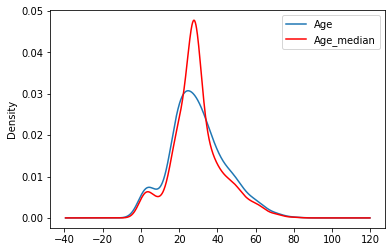

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages of Mean/Median Imputation:

##### 1) Easy to implement(Robust to outliers)
##### 2) Faster way to obtain complete dataset

### Disadvantages of Mean/Median Imputation:

##### 1) Changes or distortions in the original variance
##### 2) Impacts correlation

## Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [31]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [33]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [37]:
df['Age'].isnull().sum()

177

In [36]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [38]:
def impute_nan1(df,variable,median):
    df[variable +'_median']= df[variable].fillna(median)
    df[variable +'_random']=df[variable]
    ## it will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## Pands need to have the same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable +'_random']=random_sample
    

In [39]:
median=df['Age'].median()

In [40]:
median

28.0

In [41]:
impute_nan1(df,'Age',median)

In [42]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


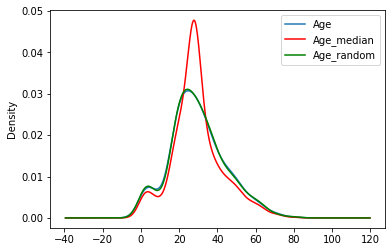

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages of Random Sample Imputation:

##### 1) Easy To implement
##### 2)There is less distortion in variance

### Disadvantages of Random Sample Imputation:

##### Every situation randomness wont work

## Capturing NAN values with a new feature
It works well if the data are not missing completely at random.

In [50]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [51]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [52]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [53]:
df['Age'].fillna(df['Age'].median(),inplace= True)

In [56]:
df.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0




### Advantages of Capturing NAN values with a new feature:

##### 1)Easy to implement
##### 2)Captures the importance of missing values
### Disadvantages of Capturing NAN values with a new feature:

###### Creating Additional Features(Curse of Dimensionality)

## End of Distribution Imputation

In [78]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


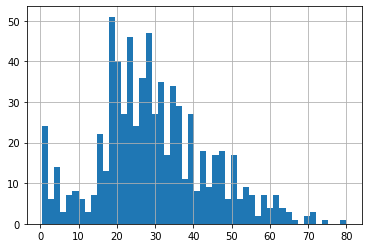

In [59]:
df['Age'].hist(bins=50);

In [64]:
extreme=df['Age'].mean()+ 3*df['Age'].std()

C:\Users\SWARNAVA\anaconda3\envs\FE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

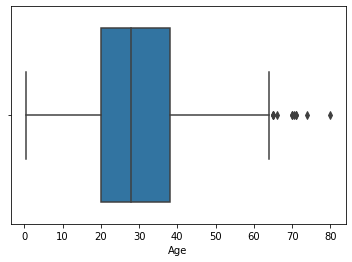

In [62]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [66]:
def impute_nan2(df,variable,median,extreme):
    df[variable +'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [67]:
impute_nan2(df,'Age',df['Age'].median(),extreme)

In [68]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

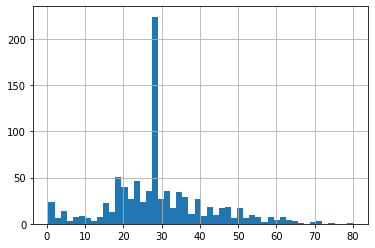

In [70]:
df['Age'].hist(bins=50)

<AxesSubplot:>

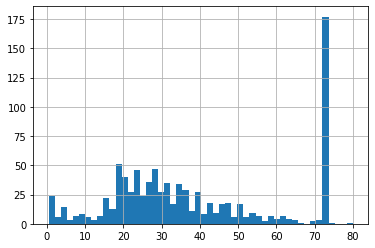

In [71]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\SWARNAVA\anaconda3\envs\FE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

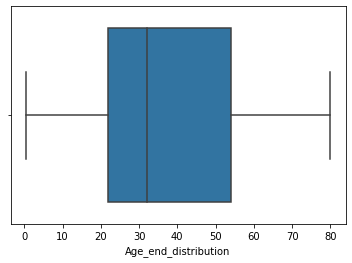

In [72]:
sns.boxplot('Age_end_distribution', data=df)

### Advantages of End of Distribution Imputation:

##### 1)Easy to implement.
##### 2)Captures the importance of missingness if there is one.

### Disdvantages of End of Distribution Imputation:

##### 1)Distorts the original distribution of the variance.
##### 2)If missingness is not important,it may mask the predictive power of the original variable by distorting its distribution.
##### 3)If the number of NA is big,it may mask true outliers in the distribution.
##### 4)If the number of NA is small,the replaced NA may be considered an outlier and preprocessed in a subsequent way of Feature Engineering.



## Arbitrary Value Imputation

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value.

In [75]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [76]:
def impute_nan3(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

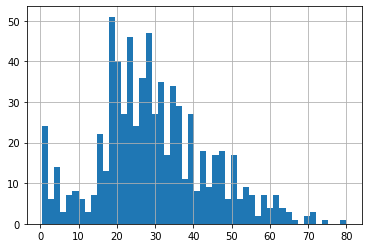

In [77]:
df['Age'].hist(bins=50)

### Advantages Arbitrary Value Imputation:

##### 1)Easy to implement
##### 2)Captures the importance of missingess if there is one

### DisadvantagesArbitrary Value Imputation:
##### 1)Distorts the original distribution of the variable
##### 2)If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
##### 3)Hard to decide which value to use

## Frequent Categories Imputation

In [80]:
data= pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [82]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [83]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [85]:
data.isnull().mean().sort_values(ascending= True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:xlabel='BsmtQual'>

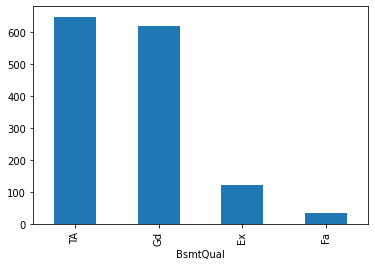

In [87]:
data.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

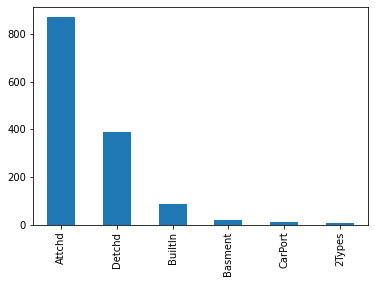

In [90]:
data['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

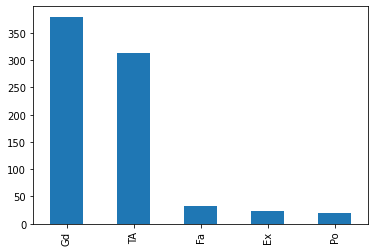

In [91]:
data['FireplaceQu'].value_counts().plot.bar()

In [93]:
data['GarageType'].value_counts().index[0]

'Attchd'

In [94]:
data['GarageType'].mode()[0]

'Attchd'

In [95]:
def impute_nan4(data,variable):
    most_frequent_category=data[variable].value_counts().index[0]
    data[variable].fillna(most_frequent_category,inplace=True)

In [96]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan4(data,feature)

In [97]:
data.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### Advantages of Frequent Categories Imputation:

##### 1)Easy To implement
##### 2)Fater way to implement 

### Disadvantages of Frequent Categories Imputation:

##### 1)Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
##### 2)It distorts the relation of the most frequent label

## Adding a variable to capture NAN

In [113]:
data= pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [114]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [115]:
import numpy as np
data['BsmtQual_var']=np.where(data['BsmtQual'].isnull(),1,0)

In [116]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [117]:
frequent=data['BsmtQual'].mode()[0]

In [118]:
data['BsmtQual'].fillna(frequent,inplace=True)

In [119]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [120]:
data['FireplaceQu_var']=np.where(data['FireplaceQu'].isnull(),1,0)
frequent=data['FireplaceQu'].mode()[0]
data['FireplaceQu'].fillna(frequent,inplace=True)

### Suppose if you have more frequent categories, we just replace NAN with a new category

In [130]:
data=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [131]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [132]:
def impute_nan5(data,variable):
    data[variable +'newvar']=np.where(data[variable].isnull(),"Missing",data[variable])

In [133]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan5(data,feature)

In [134]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [135]:
data=data.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)


In [136]:
data.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
